# 0.0 Imports

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import inflection
import math 
from matplotlib import pyplot as plt
from statistics import mean
from IPython.display import Image 
import datetime


## 0.1 Helper Functions

## 0.2 Loading Data

In [2]:
df_sales_raw = pd.read_csv('Data/train.csv', low_memory = False)
df_store_raw = pd.read_csv('Data/store.csv', low_memory = False)


# Merge:
#Neste merge ele pegou a tabela Store.csv e anexou ao lado direito da tab Train (Menos a linha Store que é a comum entre as duas)
#Creio que 'Left' quis dizer que a Coluna Store ficou ao lado Esquerdo de tudo.
df_raw = pd.merge( df_sales_raw, df_store_raw , how='left', on='Store')

In [3]:
df_raw

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [4]:
df_sales_raw

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [5]:
df_store_raw

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


# 1.0 DESCRIÇÃO DOS DADOS

In [6]:
df1 = df_raw.copy()

In [7]:
#Agora temos todas as palavras emendadas por Underlines _  :
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

## 1.1 Rename Columns

In [8]:
#df_raw.columns

In [9]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']


snakecase = lambda x: inflection.underscore( x ) 

#Map -> Aplica uma função a cada item de uma lista:
#Estamos convertendo tudo para uma lista (Ali no começo):
cols_new = list(map(snakecase, cols_old ))

#Rename:
df1.columns = cols_new

## 1.2 Data Dimensions 

In [10]:
#.Shape serve para printar linhas e colunas de um DataFrame :
#.. onde 0 significa Linhas e 1 as colunas:
print(f' Number of Rows  {df1.shape[0]}')
print(f' Number of Columns  {df1.shape[1]}')

 Number of Rows  1017209
 Number of Columns  18


## 1.3  Data types

In [11]:
#Sobrescrevemos a coluna 'date' com Ela mesma, porém convertida de 'Object' p/ o formato 'date':
df1['date'] = pd.to_datetime( df1['date'])
#Mostramos os novos resultados (Agora deixa de ser Object para ser DateTime64):
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Check NAs

In [12]:
#Mostra onde ha colunas vazias
#Sendo 0 igual a Nenhuma coluna vazia
# A esquerda o nome da Coluna
# A direita (Indo na vertical) A quantidade de linhas faltantes
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 FillOut NAs

In [13]:
df1[ 'competition_distance'].max()



75860.0

In [14]:
# competition_distance 
#..Usan um valor muito alto (200...) quando a valor da celula for nulo na tabela:
# Else -> Caso não haja um valor faltante na coluna\celula, retorna o valor que estiver la:
#Onde esta 'X' era DF1:
# Função Apply  -> Aplica esta Lambda em todas as linhas do DataSet:
# df1['competition_distance'] Na parte inicial da linha -> Especifica a coluna a qual devera ser aplicada a função:
# Repetindo "df1['competition_distance']" no Inicio da linha -> Faz com que A coluna original seja sobre-escrita
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan( x ) else x )



# competition_open_since_month  
#Sentença -> Se a coluna 'Competition_Open_Since_Month' for Nula
#..extraia o Mês da coluna 'date':
# Else -> Caso não seja Nula -> Apenas retorna o valor nela já contido:
# SEM USAR LAMBDA -> df1['date'].month if math.isnan( df1['competition_open_since_month'] ) else df1['competition_open_since_month']
#Usabdo Lambda -> Podemos substituir 'DF1' por 'X':
# df1['competition_since_month'] =  -> Será sobrescrito pelo resultado da Lambda:
#df1['competition_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan( x['competition_open_since_month'] ) else x['competition_open_since_month'], axis = 1)
df1.competition_open_since_month.fillna(df1.date.dt.month, inplace=True)

# competition_open_since_year  
#df1['competition_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan( x['competition_open_since_year'] ) else x['competition_open_since_year'], axis = 1 )
df1.competition_open_since_year.fillna(df1.date.dt.year, inplace=True)

# promo2_since_week 
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan( x['promo2_since_week'] ) else x['promo2_since_week'], axis = 1 )



# promo2_since_year               
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan( x['promo2_since_year'] ) else x['promo2_since_year'], axis = 1 )


# promo_interval (Dicionario):
Month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov',12: 'Dec', }


#Aciona a coluna promo_interval -> Se ela for NA, Será substituida por ZERO (0)
# INPLACE=TRUE ->  Ele não retornará nenhum valor, apenas modificará a coluna:

df1['promo_interval'].fillna(0, inplace = True)

#Nova Coluna a ser criada, que recebe o Valor
#.dt -> Transforma em Data
# .month -> Transforma em Mês
# Aplica/Mapeia a Lista 'Month_map' Para substituir os numeros por letras
df1['Month_Map'] = df1['date'].dt.month.map( Month_map)


In [15]:
#TESTANDO PEDAÇO DO CODIGO DA CELULA DE CIMA:

# promo_interval (Dicionario):
Month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov',12: 'Dec', }


#Aciona a coluna promo_interval -> Se ela for NA, Será substituida por ZERO (0)
# INPLACE=TRUE ->  Ele não retornará nenhum valor, apenas modificará a coluna:

df1['promo_interval'].fillna(0, inplace = True)

#Nova Coluna a ser criada, que recebe o Valor
#.dt -> Transforma em Data
# .month -> Transforma/Conveter para Mês
# Aplica a Lista 'Month_map' Para substituir os numeros por letras
df1['Month_Map'] = df1['date'].dt.month.map( Month_map)

#Dividir Onde houver Virgulas (.split(',')):
#Verifica se 'df1['Month_map'] is' Esta dentro desta lista (Promo_interval)
#axis=1  -> Pois esta sendo usada mais de Uma Coluna :
#Tudo isso sera inserido numa nova coluna chamada 'is_promo':
# Se estiver no intervalo da promoção -> Retorna ZERO:
df1['is_promo'] = df1[['promo_interval', 'Month_Map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['Month_Map'] is x['promo_interval'].split(',') else 0, axis=1)



In [16]:
backup = df1.copy()

In [17]:
#NÃO FUNCIONOU
#df1.sample(25).T

In [18]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
Month_Map                       0
is_promo                        0
dtype: int64

In [19]:
# Novo Valor Máximo = 200000.0 Metro:
df1[ 'competition_distance'].max()

200000.0

In [20]:
df3 = df1

In [21]:
# substitui os 0 para '', assim não será necessário um dos if's do is_promo
df3['promo_interval'].replace(0, '', inplace=True)
# mesmo aqui
df3['promo_interval'].fillna('', inplace=True) 

# obtem a abreviatura do mês  %b == Mês
df3['Month_Map'] = df3['date'].dt.strftime("%b") 

# como não tem 0's mais, tudo vai ser string, então podemos remover aqueles if's
df1['is_promo'] = df3[['promo_interval', 'Month_Map']].apply(lambda x: x['Month_Map'] in x['promo_interval'].split( ',' ), axis='columns').astype('int')

In [22]:
#IS_PROMO -> Funciona AQUI !!!
df3.sample(25).T

,183589,540046,1009970,293817,196975,121532,478229,141424,758263,368408,...,203691,158774,887170,722464,325160,219814,342599,846508,272579,531127
store,730,57,566,478,736,1113,680,935,849,238,...,762,445,416,730,1062,160,679,1009,803,58
day_of_week,2,2,1,5,4,2,2,5,3,2,...,5,3,6,7,7,4,2,1,7,3
date,2015-02-17 00:00:00,2014-03-04 00:00:00,2013-01-07 00:00:00,2014-10-31 00:00:00,2015-02-05 00:00:00,2015-04-14 00:00:00,2014-04-29 00:00:00,2015-03-27 00:00:00,2013-08-21 00:00:00,2014-08-12 00:00:00,...,2015-01-30 00:00:00,2015-03-11 00:00:00,2013-04-27 00:00:00,2013-09-22 00:00:00,2014-09-28 00:00:00,2015-01-15 00:00:00,2014-09-09 00:00:00,2013-06-03 00:00:00,2014-11-23 00:00:00,2014-03-12 00:00:00
sales,8837,14575,6623,8322,6105,7075,5489,6260,5673,6274,...,5257,7185,9718,0,0,6127,9023,6402,0,4675
customers,1010,1280,671,844,544,668,776,660,728,1057,...,470,1220,1350,0,0,606,1032,553,0,426
open,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,1,1,1,0,1
promo,1,1,1,0,1,1,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
state_holiday,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
school_holiday,0,0,0,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
store_type,c,d,a,d,c,a,c,a,c,a,...,d,a,a,c,d,d,a,a,d,a


In [23]:
df3.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
Month_Map                       0
is_promo                        0
dtype: int64

## 1.6 Change Types

In [24]:
df3.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
Month_Map                               object
is_promo                                 int64
dtype: object

In [25]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
Month_Map                               object
is_promo                                 int64
dtype: object

In [26]:
# Comando .astype( int ) Mudou a coluna de Float64 para INT:
df3['competition_open_since_month'] = df3['competition_open_since_month'].astype( int )
df3['competition_open_since_year'] = df3['competition_open_since_year'].astype( int )

df3['promo2_since_week'] = df3['promo2_since_week'].astype( int )
df3['promo2_since_year'] = df3['promo2_since_year'].astype( int )

## 1.7 Descriptive Statistical 

In [27]:
num_atributes = df3.select_dtypes( include=['int64' , 'float64'])
cat_atributes = df3.select_dtypes( exclude=['int64' , 'float64', 'datetime64[ns]'])

In [28]:
#num_atributes.sample(4)
cat_atributes.sample(4)

,state_holiday,store_type,assortment,promo_interval,Month_Map
456949,0,d,c,,May
687843,0,a,a,"Feb,May,Aug,Nov",Oct
912134,0,d,a,"Jan,Apr,Jul,Oct",Apr
659450,0,a,a,"Mar,Jun,Sept,Dec",Nov


## 1.7.1 Numerical Atributes

In [29]:
# Central Tendency = mena , median
# .T Inverte -> Colunas == Linhas
ct1 = pd.DataFrame(num_atributes.apply(np.mean) ).T
ct2 = pd.DataFrame(num_atributes.apply(np.median) ).T

# Dispersão = std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_atributes.apply( np.std)).T
d2 = pd.DataFrame(num_atributes.apply( min ) ).T
d3 = pd.DataFrame(num_atributes.apply( max ) ).T

d4 = pd.DataFrame(num_atributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame(num_atributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame(num_atributes.apply( lambda x: x.kurtosis()  ) ).T


# Concat
m = pd.concat( [d2, d3, d4, ct1, ct2, d5, d6 ]).T.reset_index()

#Nomeando as colunas:
m.columns = ( ['Atributes', 'Min', 'Max', 'Range', 'Median', 'Std', 'Skw','Kurtosis'])

In [30]:
m.T
#m

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Atributes,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
Min,1.0,1.0,0.0,0.0,0.0,0.0,0.0,20.0,1.0,1900.0,0.0,1.0,2009.0,0.0
Max,1115.0,7.0,41551.0,7388.0,1.0,1.0,1.0,200000.0,12.0,2015.0,1.0,52.0,2015.0,1.0
Range,1114.0,6.0,41551.0,7388.0,1.0,1.0,1.0,199980.0,11.0,115.0,1.0,51.0,6.0,1.0
Median,558.429727,3.998341,5773.818972,633.145946,0.830107,0.381515,0.178647,5935.442677,6.786849,2010.32484,0.500564,23.619033,2012.793297,0.165966
Std,558.0,4.0,5744.0,609.0,1.0,0.0,0.0,2330.0,7.0,2012.0,1.0,22.0,2013.0,0.0
Skw,-0.000955,0.001593,0.64146,1.59865,-1.758045,0.487838,1.677842,10.242344,-0.042076,-7.235657,-0.002255,0.178723,-0.784436,1.795644
Kurtosis,-1.200524,-1.246873,1.778375,7.091773,1.090723,-1.762018,0.815154,147.789712,-1.232607,124.071304,-1.999999,-1.184046,-0.210075,1.224338


/home/dikson/.pyenv/versions/3.9.2/envs/DS_2/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histograma de Vendas')

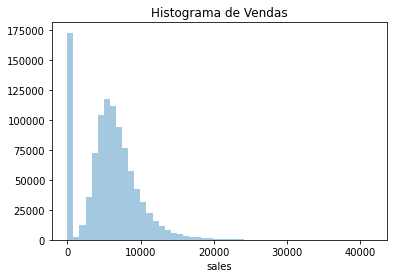

In [31]:
#DA PAU
#sns.distplot( df3['sales'])

#DA CERTO:
# https://compucademy.net/python-seaborn-distplot-is-a-deprecated-function/
sns.distplot(df3['sales'], kde = False).set_title("Histograma de Vendas")



Text(0.5, 1.0, 'Distancia do competidor')

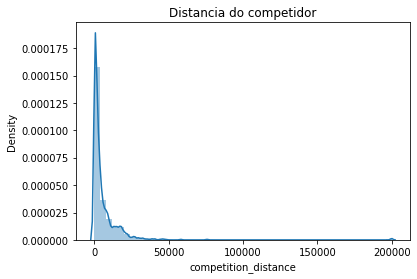

In [32]:
sns.distplot(df3['competition_distance'], kde = True).set_title("Distancia do competidor")

## 1.7.2

In [33]:
#Mostra todos os valores/Tipos Unicos de cada Categoria:
cat_atributes.apply( lambda x: x.unique().shape[0] )

state_holiday      4
store_type         4
assortment         3
promo_interval     4
Month_Map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

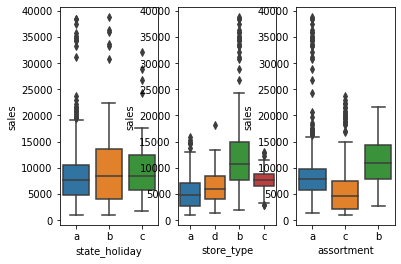

In [34]:
#Define que só vão ser mostradas as informações NÃO nulas em 'state_holiday' & 'sales':
aux1 = df3[(df3['state_holiday'] != '0') & (df1['sales'] > 0)]

plt.subplot(1,3,1)
sns.boxplot(x='state_holiday', y='sales' , data=aux1)

plt.subplot(1,3,2)
sns.boxplot( x='store_type', y='sales', data=aux1)

plt.subplot(1,3,3)
sns.boxplot( x='assortment', y='sales', data=aux1)

# 2.0. FEATURE ENGINERING

In [35]:
df2 = df3.copy()

## 2.1. Mapa Mental de Hipoteses

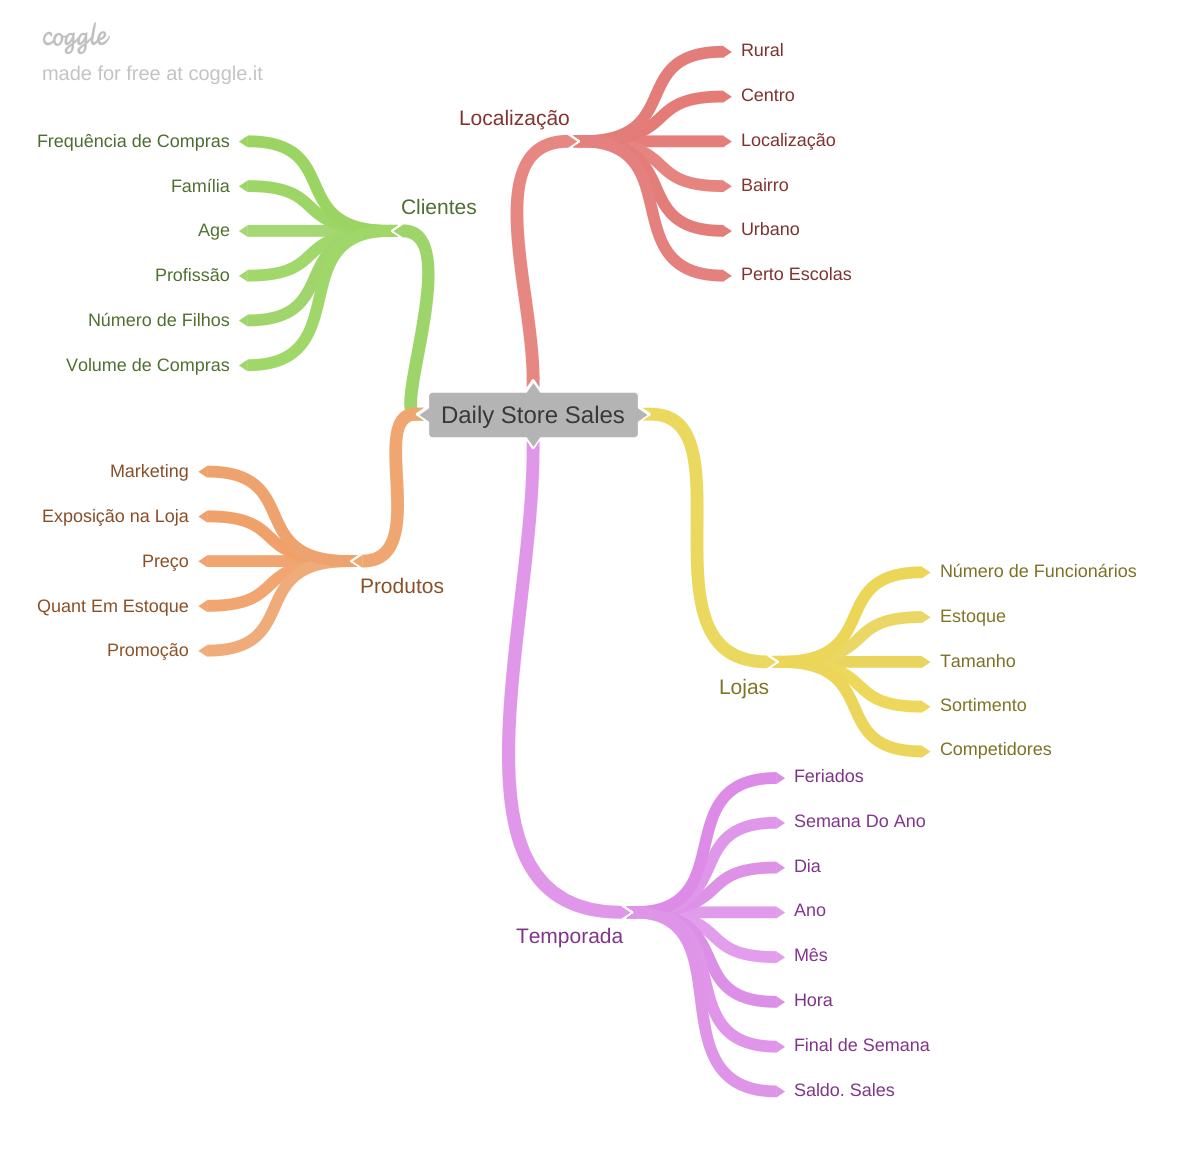

In [36]:
Image('img/MindMapHypothesis.png')

## 2.1. Criação Das Hipoteses

### 2.1.1 Hipoteses Loja

**1.** Lojas com Maior Quadro De Funcionários Deveriam Vender Mais

**2.** Lojas com Maior Estoque deveriam Vender Mais

**3.** Lojas com Maior Porte Deveriam Vender Mais

**4.** Lojas com Menor Porte Deveriam vender Menos

**5.** Lojas Com Maior Sortimento Deveriam Vender Mais


### 2.1.2 Hipoteses Do Produto

**1.** Lojas Que Investem Mais em Marketing Deveriam Vender Mais

**2.** Lojas com Maior Exposição de produtos Deveriam Vender Mais

**3.** Lojas com Menor preço no produtos Deveriam Vender Mais

**4.** Lojas com Preços Menores por Mais tempo deveriam vender mais

**5.** Lojas com Melhores promoções Deveriam Vener mais

**6.** Lojas com Promoções ativas por mais tempo Deveriam Vender Mais

**7.** Lojas com Mais Dias de promoção Deveriam Vender Mais

**8.** Lojas com Mais promoções consecutivas deveriam vender Mais

### 2.1.3 Hipoteses Tempo

**1.** Com Mais Feriados ; Vendem Menos

**2.** Funcionam nos primeiros 6 Meses do Ano (Vendem mais)

**3.** Abrem nos finais de semana; Vendem Mais 

**4.** Lojas Deveriam Vender mais depois do Dia 10 de Cada Mês

**5.** Lojas Deveriam Vender menos aos finais de Semana

**6** Lojas deveriam vender Menos durante os feriados escolares

## 2.2 Lista Final De Hipoteses

**1** Lojas Com Maior Sortimento Deveriam Vender Mais

**2** Lojas Com Competidores mais proximos deveriam vender menos

**3** Lojas Com Competidores a mais tempo deveriam vender mais. 



**4.** Lojas com Promoções ativas por mais tempo Deveriam Vender Mais

**5.** Lojas com Mais Dias de promoção Deveriam Vender Mais

**6.** Lojas com Mais promoções consecutivas deveriam vender Mais


**7.** Com Mais Feriados ; Vendem Menos

**8.** Funcionam nos primeiros 6 Meses do Ano (Vendem mais)

**9.** Abrem nos finais de semana; Vendem Mais 

**10.** Lojas Deveriam Vender mais depois do Dia 10 de Cada Mês

**11.** Lojas Deveriam Vender menos aos finais de Semana

**12** Lojas deveriam vender Menos durante os feriados escolares

## 2.3 Feature Engineering

In [43]:
# # year
# # -> Extraindo Ano de Data, e Guardando Numa nova Coluna Chamada 'year'
# df2['year'] = df2['date'].dt.year

# # mounth
# df2['month'] = df2['date'].dt.month

# # day
# df2['day'] = df2['date'].dt.day

# # week of year
# df2['week_of_year'] = df2['date'].dt.weekofyear

# # year week
# df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

# #QUANTO TEMPO DESDE A DATA DA COMPRA DESDE QUANDO A COMPETIÇÃO COMEÇOU


# # competition since
# # -> o 'x' esta sendo usado pois vai ser aplicada uma função Lambda | O 1 -> Se trata de todo dia 1 de cada mês:
# # -> AXIS=1  -> Devido a estarem sendo usadas Duas Colunas
# # -> Traduzindo: Aplicar a função ... Nas colunas ... de DF2:
# # -> Guarda Os Resultados Disso numa Nova Coluna Chamada 'copetition_since':
# # -> Juntou as colunas 'competition_open_since_month' & 'competition_open_since_year' EX: Na Month tinha o Mês 9 e na Year o ano 2008 == 09/2008 e
# # .. Acrescentou o Dia 1 como padrão para todas estas uniões.
# df2['competition_since'] = df2.apply( lambda x: datetime.datetime( year=x['competition_open_since_year'], month=x['competition_open_since_month'], day=1 ), axis=1 )
                                     

# # Creio que sto se refira a quantos meses a competição perdurou:
# df2['competition_time_month'] = (( df2['date'] - df2['competition_since'] )/30).apply( lambda x: x.days).astype( int )

                                     

# # promo since
# # DESDE QUANDO A PROMOÇÃO ESTA ATIVA
# df2['promo_since'] = df2['promo2_since_year'].astype( str ) + '-' + df2['promo2_since_week'].astype( str )

# #-> %w  (Minusculo) == Semana de Domingo a Domingo
# # -> Não precisa usar AXIS=1 Pois somente a coluna promo_since vai ser trabalhada:
# #-> Promo_Since esta sobreescrevendo ela mesma:
# df2['promo_since'] = df2['promo_since'].apply( lambda x:  datetime.datetime.strptime( x + '-1', '%Y-%W-%w') - datetime.timedelta( days=7) )

# #Nova coluna 'promo_time_week' -> Refere-se a qantidade de semanas em que a promoção esta ativa:
# df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since']) /7 ).apply( lambda x: x.days).astype( int )


# assortment
#-> Retorna Basic IF x == a

df2['assortment'] = df2['assortment'].apply(lambda x:  'basic' if x ==  'a' else 'extra' if x == 'b' else 'extended' )

# state holiday 
#-> Creio Eu que 'x' seja um cursosr que percorre a tabela toda, e vai encontrar 'a', 'b', e 'c' na coluna 'store_type':
#.. E então inserir os retornos na coluna 'state_holiday', de acordo com a descrição no site Kaggle:
df2['state_holiday'] = df2['state_holiday'].apply( lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christimas' if x == 'c' else 'regular_day')


In [55]:
#print(df2.head(3))
df2.head(25).T
#df2['state_holiday'].head(25)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
store,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
day_of_week,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,...,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822,5651,15344,8492,8565,7185,...,10231,8430,10071,8234,9593,9515,6566,7273,14190,14180
customers,555,625,821,1498,559,589,1414,833,687,681,...,979,946,936,718,974,682,633,560,1082,1586
open,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
promo,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day,regular_day,regular_day,regular_day,regular_day,regular_day,...,regular_day,regular_day,regular_day,regular_day,regular_day,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,0,1,1,1
store_type,c,a,a,c,a,a,a,a,a,a,...,a,a,d,a,d,c,a,d,a,c


# 3.0. PASSO 03 - FILTRAGEM DE VARIÁVEIS

In [58]:
df3 = df2.copy()

In [63]:
df3.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


## 3.1. Filtragem das linhas

In [61]:
#CONDIÇÕES
#Que as vendas sejam Maiores que 0
# 'Open' = 0 Significa Loja fechada. Então sabemos que as vendas são 0
df3 = df3[(df3 ['open'] != 0 ) & (df3['sales'] > 0 )]


## 3.2 Seleção das Colunas

In [64]:
#CRIA UMA LISTA COM AS COLUNAS A SEREM IGNORADAS ou EXCLUIDAS:
cols_drop = ['customers', 'open', 'promo_interval', 'Month_Map']
#Método DROP (Colunas_Definidas, axis=1 significa Colunas & axis=0 == Linhas)
#E, guarda os resultados dentro do proprio DF3:
df3 = df3.drop(cols_drop, axis=1)

In [65]:
#Observe que as colunas citadas em cols_drop Já não constam mais:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')